In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import entropy

from midiutil import MIDIFile

**Define line of fifths mapping**

In [2]:
steps = {"F": -1, "C": 0, "G": 1, "D": 2, "A": 3, "E": 4, "B": 5}

note2lof = {}

for step, accidentals in steps.items():
    note2lof.update({step : accidentals})
    
for step, accidentals in steps.items():
    note2lof.update({step+'#' : accidentals+7})

for step, accidentals in steps.items():
    note2lof.update({step+'b' : accidentals-7})

for step, accidentals in steps.items():
    note2lof.update({step+'x' : accidentals+14})

for step, accidentals in steps.items():
    note2lof.update({step+'bb' : accidentals-14})
    
# construct line of fifths
lof = sorted(note2lof, key=note2lof.__getitem__)

vocabulary = note2lof.keys()
V = len(vocabulary)

In [3]:
lof2note = {v:k for k, v in note2lof.items()}

**Read Chopin piece from Temperley's KP Corpus**

In [4]:
df = pd.read_csv('output/agnus.csv', sep='\s*', header=None, names=['type', 'onset', 'offset', 'MIDI', 'TPC'])
df.head()

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2230: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())
C:\ProgramData\Anaconda3\lib\site-packages\pandas\io\parsers.py:2232: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


,type,onset,offset,MIDI,TPC
0,TPCNote,0,735,69,5
1,TPCNote,0,735,65,1
2,TPCNote,0,735,62,4
3,TPCNote,0,735,50,4
4,TPCNote,910,1645,70,0


In [5]:
# Temperley's encoding has C=2 (http://www.link.cs.cmu.edu/music-analysis/harmony.html). Shift so that C=0
df.TPC -= 2

In [6]:
df['tpc_name'] = df['TPC'].map(lof2note) # add spelled note names

In [7]:
df.groupby('onset')['tpc_name'].apply(list)[:10]

onset
0          [A, F, D, D]
910      [Bb, F, Bb, D]
1820       [C, F, F, D]
2730            [Bb, G]
3640      [A, E, A, C#]
7280      [A, E, A, C#]
8190     [Bb, E, G, C#]
9100       [C, E, G, C]
10010           [Bb, C]
10920      [A, F, C, F]
Name: tpc_name, dtype: object

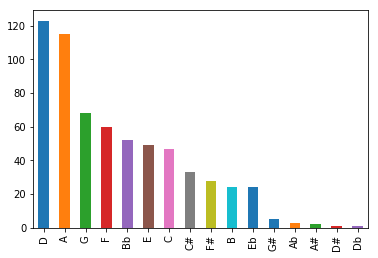

In [8]:
df.tpc_name.value_counts().plot.bar();

In [9]:
df.head()

,type,onset,offset,MIDI,TPC,tpc_name
0,TPCNote,0,735,69,3,A
1,TPCNote,0,735,65,-1,F
2,TPCNote,0,735,62,2,D
3,TPCNote,0,735,50,2,D
4,TPCNote,910,1645,70,-2,Bb


In [10]:
def df2midi(df, path=None, track=0, channel=0, tempo=50_000, volume=100):
    
    degrees   = df.MIDI.values  # MIDI note number
    onsets    = df.onset.values  # In beats
    durations = (df.offset - df.onset).values  # In beats
    
    track     = track
    channel   = channel
    tempo     = tempo   # In BPM
    volume    = volume  # 0-127, as per the MIDI standard

    MyMIDI = MIDIFile(1)  # One track, defaults to format 1 (tempo track is created
                          # automatically)
    MyMIDI.addTempo(track, time, tempo)

    for i, (pitch, onset, duration) in enumerate(zip(degrees, onsets, durations)):
        MyMIDI.addNote(track, channel, pitch, onset, duration, volume)
    
    if path is not None:
        with open(path, "wb") as output_file:
            MyMIDI.writeFile(output_file)

In [17]:
df2midi(df, path='testfile.mid')

NameError: name 'time' is not defined

**Import MIDI data**

In [ ]:
path = '../../GitHub/DCMLab/HistoryOfModes/pitch_class_distributions.csv'

In [12]:
midi = pd.read_csv(path)

NameError: name 'path' is not defined

In [ ]:
midi.shape

There are 12,625 pieces with year information

In [13]:
midi_by_year = midi.groupby('year').mean().iloc[:,1:]

NameError: name 'midi' is not defined

In [14]:
midi_by_year.shape

NameError: name 'midi_by_year' is not defined

In [15]:
midi_by_year.index.min()

NameError: name 'midi_by_year' is not defined

In [16]:
idx = np.arange(midi_by_year.index.min(), midi_by_year.index.max())
midi_all_years = pd.DataFrame(0, index=idx, columns=["pc"+str(i) for i in range(12)])

NameError: name 'midi_by_year' is not defined

In [269]:
for i, row in midi_all_years.iterrows():
    if i in midi_by_year.index:
        midi_all_years.loc[i,:] = midi_by_year.loc[i,:]
    else:
        midi_all_years.loc[int(i),:] = midi_all_years.loc[int(i)-1,:]

In [270]:
midi_all_years.shape

(775, 12)

but only compositions in 347 distinct years

In [271]:
midi_all_years.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
1199.0,0.129996,0.000000,0.138726,0.000000,0.277669,0.00579,0.031026,0.082177,0.000000,0.297904,0.000000,0.036711
1200.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1201.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1202.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1203.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795


In [273]:
years = midi_all_years.index
pcs = midi_all_years#.iloc[:,3:]
pcs.head()

,pc0,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11
1199.0,0.129996,0.000000,0.138726,0.000000,0.277669,0.00579,0.031026,0.082177,0.000000,0.297904,0.000000,0.036711
1200.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1201.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1202.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795
1203.0,0.146819,0.016206,0.109305,0.086009,0.074099,0.11020,0.014697,0.220574,0.074846,0.079796,0.031656,0.035795


Reorder pcs in circle of fifths

In [274]:
shift = 6

pcs.columns = [str(j) for j in range(12)]
pcs = pcs[[str((j*7 + shift) % 12) for j in range(12)]] # sort in fifths and shift so that C=0 is in center

In [275]:
pcs.head()

,6,1,8,3,10,5,0,7,2,9,4,11
1199.0,0.031026,0.000000,0.000000,0.000000,0.000000,0.00579,0.129996,0.082177,0.138726,0.297904,0.277669,0.036711
1200.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795
1201.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795
1202.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795
1203.0,0.014697,0.016206,0.074846,0.086009,0.031656,0.11020,0.146819,0.220574,0.109305,0.079796,0.074099,0.035795


Plot NPC evolution

In [280]:
ws = 50
win_type= 'cosine'
center=False

x = midi_all_years.index
y = midi_all_years.fillna(0).T.rolling(ws, axis=1, win_type=win_type, center=center).mean().values

In [281]:
H = midi_all_years.fillna(0).apply(entropy, axis=1) / np.log2(12)
H = H.rolling(ws, win_type=win_type, center=center).mean().values

In [282]:
colors = sns.color_palette('twilight_shifted',12)

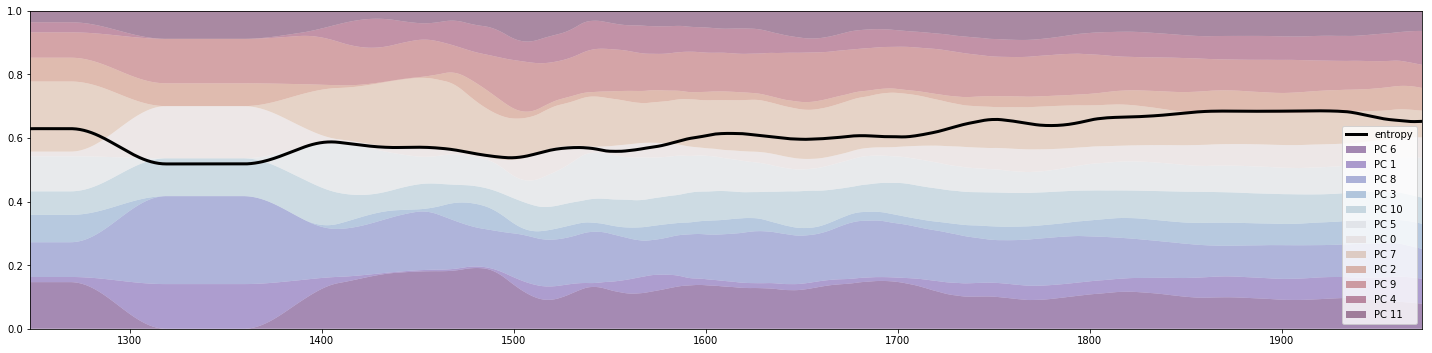

In [283]:
fig, ax = plt.subplots(figsize=(20,5))

ax.stackplot(x,y, colors=colors, labels=["PC " + str(l) for l in pcs.columns], alpha=0.5)
ax.plot(x,H, lw=3, color='k', label='entropy')
plt.legend()
plt.tight_layout()
plt.margins(0,0)
plt.show();

**Todo:**
1. Bootstrap subsamples and calculate entropy
1. Convert my corpus to NPC and compare with this corpus
1. Evaluate Temperley's pitch-spelling algorithm on my corpus assuming all spelling is correct
1. Apply Temperley's pitch-spelling algorithm and compare the two corpora

In [284]:
ent.shape, H.shape

((327,), (775,))

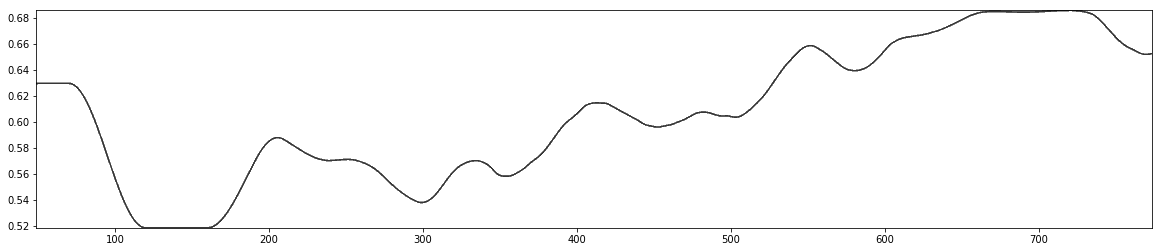

In [294]:
fig, ax = plt.subplots(figsize=(20,4))

for i in range(100):
    sampled = midi.sample(n=midi.shape[0], replace=True, axis=0)
    
    idx = np.arange(midi_by_year.index.min(), midi_by_year.index.max())
    midi_all_years = pd.DataFrame(0, index=idx, columns=["pc"+str(i) for i in range(12)])
    
    for i, row in midi_all_years.iterrows():
        if i in midi_by_year.index:
            midi_all_years.loc[i,:] = midi_by_year.loc[i,:]
        else:
            midi_all_years.loc[int(i),:] = midi_all_years.loc[int(i)-1,:]
    
    ent = midi_all_years.fillna(0).apply(entropy, axis=1) / np.log2(12)
    ent = ent.rolling(ws, win_type=win_type, center=center).mean().values
    ax.plot(ent, color='k', alpha=.01)
# ax.plot(H, color='r')
# plt.ylim(0,1)
plt.margins(0,0)

In [22]:
liszt = pd.read_csv('../../GitHub/DCMLab/ExtendedTonality/data/DataFrames/Liszt_S202_Am_Grabe_R.xml.csv', index_col=0)
liszt.columns

Index(['filepath', 'composer', 'filename', 'measure_no', 'no_accs', 'mode',
       'key_area', 'type', 'note_name', 'tpc', 'step', 'acc', 'octave',
       'pitch', 'pitch_class', 'duration', 'onset'],
      dtype='object')

In [26]:
liszt[['measure_no', 'onset', 'tpc', 'pitch_class']]

,measure_no,onset,tpc,pitch_class
0,1,0.0,NaN,NaN
1,2,2.0,NaN,NaN
2,3,4.0,NaN,NaN
3,4,6.0,NaN,NaN
4,5,8.0,NaN,NaN
5,6,10.0,NaN,NaN
6,7,12.0,NaN,NaN
7,7,13.0,D,2.0
8,8,14.0,D,2.0
9,8,15.0,D#,3.0
